# Linear Regression
## What is linear regression?
Regression is a method of modelling a target value based on independent predictors.

This method is mostly used for forecasting and finding out cause and effect relationship between variables.

`y = w0 + w1x`

risiduals = errors

<img src="https://drive.google.com/uc?id=1Kwo_izWib_Kf4Ey2Bvn2PFWe4ADX93Vc" width="500px">

The motive of the linear regression algorithm is to find the best values for `w0` and `w1`.

Credit: [Link1](https://www.keboola.com/blog/linear-regression-machine-learning
), [Link2](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a
)



## Still confused – let’s see an example!
You can think of linear regression as the answer to the question **“How can I use X to predict Y?”**

Let’s look at a concrete example. 
- You might be wondering how much you can sell your house for. You have information about your house, for instance, the number of bedrooms is 2 - this is your X. And you want to know how much your estate could be worth on the market. This is Y - the price in $ that you can sell your house for. 
- We obtain the equation by training it on pairs of (X, Y) values. In this case, we would use a dataset containing historic records of house purchases in the form of (“number of bedrooms”, “selling price”).

| Number of bedrooms | Selling price (usd) |
|------------------|-------------|
| 2                  |  120,000     |
| 3                  |  140,000     |
| 4                  |  180,000     |
| 6                  |  420,000     |

### Making predictions
Now, let’s say that we trained a linear regression model to get an equation in the form:

`Selling price = $77,143 * (Number of bedrooms) - $74,286`

The equation acts as a prediction. If you input the number of bedrooms, you get the predicted value for the price at which the house is sold. 

For the specific example above:

`Your selling price = $77,143 * 2 bedrooms - $74,286 = $80,000`

## Simple linear regression vs. multiple linear regression

Both simple and multiple linear regressions assume that there is a linear relationship between the input variable(s) and the output target variable.

The main difference is the number of independent variables that they take as inputs. 

- **Simple linear regression** takes a single feature.
- **Multiple linear regression** takes multiple x values. 

<img src="https://drive.google.com/uc?id=1QRqINFqAReCRcZe_BfqHeTQJqsJI0HHM" width="300px">


<img src="https://drive.google.com/uc?id=1QSkJkUSZlXkKjhm1AcrljJpCaiwHkfkp" width="500px">

## Training linear regression:Ordinary Least Squares

We train the linear regression algorithm with a method named Ordinary Least Squares (or just Least Squares). 
The goal of training is to find the weights wi in the linear equation `y = w0 + w1x`.

The *Ordinary Least Squares* procedure has four main steps in machine learning:
- Random weight initialization
- Input the initialized weights into the linear equation and generate a prediction for each observation point.
- Calculate the Residual Sum of Squares (RSS)
- Model parameter selection to minimize RSS

| Number of Bedrooms | Actual Selling Price | Predicted Selling Price | Residuals (Actual - Predicted) | Residual Squared |
| ------- | ------- | ------- | ------- | ------- |
| 2 | 120,000 | 80,000 | 40,000 | 1,600,000,000 |
| 3 | 140,000 | 157,143 | -17,143 | 293,882,449 |
| 4 | 180,000 | 234,286 | -54,286 | 2,946,969,796 |
| 6 | 420,000 | 388,572 | 31,428,000 | 987,719,184 |


## Training linear regression:Gradient Descent

### Cost Function

It is a minimization problem where we would like to minimize the error between the predicted value and the actual value.

<img src="https://drive.google.com/uc?id=1QV1sqaibQQCpXd253fUEDqVPFmvD_Env" width="400px">


Gradient descent is a method of updating `w0` and `w1` to reduce the **cost function (MSE)**. The idea is that we start with some values for `w0` and `w1` and then we change these values iteratively to reduce the cost. 
Gradient descent helps us on how to change the values.



To update `a0` and `a1`, we take gradients from the cost function. To find these gradients, we take partial derivatives with respect to `a0` and `a1`.

**Alpha** is the learning rate which is a hyperparameter that you must specify.

<img src="https://drive.google.com/uc?id=1QWlPRecRIhM7OwAzROyKPeu8Qi1k_96D" width="600px">


<img src="https://drive.google.com/uc?id=1Q_GTaZs8BQA79jyw41r33GfGT42GMsmb" width="400px">

## Model evaluation
**Mean Squared Error (MSE)**
- MSE is computed as RSS divided by the total number of data points. MSE tells us what the average RSS is per data point.

**Root Mean Squared Error (RMSE)**
- RMSE takes the MSE value and applies a square root over it. It is similar to MSE, but much more intuitive for error interpretation.

**R2 or R-squared or R2 score**
- R-squared is a measure of how much variance in the dependent variable that our linear function accounts for. 
- As a rule of thumb, an R-squared value that is closer to 1 is better.


## Model improvement
### Data preprocessing
- **Remove outliers.** Outliers in the quantitative response y skew the slope of the line disproportionately. Remove them to have a better-fitted line. 
- **Remove multicollinearity.** Linear regression assumes that there is little or no correlation between the input values - otherwise, it overfits the data. Create a correlation matrix for all of your features to check which pairs of features suffer from high correlation. Remove these features to keep just one.
- **Assert normal distribution.** The model assumes that the independent variables follow a Gaussian distribution. Transform your variables with log transform if they are not normally distributed.
- **Assert linear assumption.** If your independent variables do not have a linear relationship with your predictor variable, log transform them to reshape polynomial relationships into linear. 


### Feature scaling
- Features can come in different orders of magnitude. Using our example of the housing price prediction, the number of bedrooms would be on a scale from 1 - 10 (approximately), while the housing area in square feet would be 100-1000 times bigger (1000-10,000 square feet).
- Features of different scales convert slower (or not at all) with gradient descent.
- Normalize and standardize your features to speed up and improve model training. 


# Let's code simple linear regression using Gradient Descent

I used the randomed data from this [link](https://www.kaggle.com/andonians/random-linear-regression/data). 

Let’s visualise the training and testing data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Create train and test dataframes from csv files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

(700, 2)
(300, 2)


In [ ]:
# Get independent variable (x) and dependent variable (y) as series
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

# Convert to Numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape x data
x_train = x_train.reshape(-1,1) # or x_train.reshape(700,1)
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


print('Training X data:', x_train[:5])
print('Testing X data:', x_test[:5])
print('Training Y data:', y_train[:5])
print('Testing Y data:', y_test[:5])

Training X data: [[24]
 [50]
 [15]
 [38]
 [87]]
Testing X data: [[77]
 [21]
 [22]
 [20]
 [36]]
Training Y data: [[21.54945196]
 [47.46446305]
 [17.21865634]
 [36.58639803]
 [87.28898389]]
Testing Y data: [[79.77515201]
 [23.17727887]
 [25.60926156]
 [17.85738813]
 [41.84986439]]


      x          y
0    24  21.549452
1    50  47.464463
2    15  17.218656
3    38  36.586398
4    87  87.288984
..   ..        ...
695  58  58.595006
696  93  94.625094
697  82  88.603770
698  66  63.648685
699  97  94.975266

[700 rows x 2 columns]


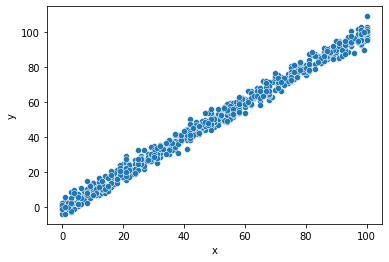

In [ ]:
print(df_train)
sns.scatterplot(data=df_train, x="x", y="y")

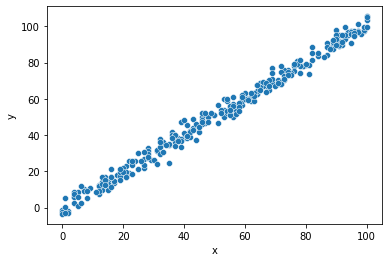

In [ ]:
sns.scatterplot(data=df_test, x="x", y="y")

Now, let’s build our own linear regression model from the equations above. 

We will be using only numpy library for the computations and the R2 score for metrics.

In [ ]:
n = 700
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

epochs = 0

while(epochs < 1000):
    y = a_0 + a_1 * x_train
    error = y - y_train
    mean_sq_er = np.sum(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n 
    a_1 = a_1 - alpha * 2 * np.sum(error * x_train)/n
    epochs += 1
    if(epochs%100 == 0):
        print(mean_sq_er)

7.898508973517025
7.898481228441524
7.898453760289766
7.898426566297775
7.898399643729158
7.898372989874843
7.898346602052785
7.898320477607717
7.898294613910871
7.898269008359719


In [ ]:
a_0[0,0]

0.009796763956916487

In [ ]:
a_1[0,0]

0.998969172980592

Slope:  0.998969172980592
Y-intersection:  0.009796763956916487

R2 Score: 0.9887784704059838
          test    predict
0    79.775152  76.930423
1    23.177279  20.988149
2    25.609262  21.987119
3    17.857388  19.989180
4    41.849864  35.972687
..         ...        ...
295  68.545888  70.936608
296  47.334876  45.962379
297  54.090637  54.953101
298  63.297171  61.945885
299  52.459467  46.961348

[300 rows x 2 columns]


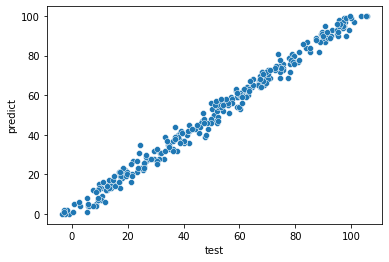

In [ ]:
b_0 = a_0[0,0]
b_1 = a_1[0,0]
print('Slope: ', b_1)
print('Y-intersection: ', b_0)
print()
y_pred = b_0 + b_1 * x_test
print('R2 Score:', r2_score(y_test, y_pred))

y_compare = np.concatenate((y_test, y_pred), axis=1)
y_df = pd.DataFrame(y_compare, columns = ['test','predict'])
print(y_df)
sns.scatterplot(data=y_df, x='test', y='predict')

[0.009796763956916487, 1.0087659369375084, 2.0077351099181002, 3.0067042828986925, 4.005673455879284, 5.004642628859876, 6.003611801840468, 7.0025809748210595, 8.001550147801652, 9.000519320782244, 9.999488493762836, 10.998457666743429, 11.997426839724021, 12.996396012704613, 13.995365185685204, 14.994334358665796, 15.993303531646388, 16.99227270462698, 17.99124187760757, 18.990211050588165, 19.989180223568756, 20.98814939654935, 21.98711856952994, 22.98608774251053, 23.985056915491125, 24.984026088471715, 25.98299526145231, 26.9819644344329, 27.98093360741349, 28.979902780394085, 29.978871953374675, 30.97784112635527, 31.97681029933586, 32.97577947231645, 33.97474864529704, 34.973717818277635, 35.97268699125822, 36.971656164238816, 37.97062533721941, 38.9695945102, 39.96856368318059, 40.967532856161185, 41.96650202914178, 42.965471202122366, 43.96444037510296, 44.963409548083554, 45.96237872106414, 46.961347894044735, 47.96031706702533, 48.959286240005916, 49.95825541298651, 50.957224

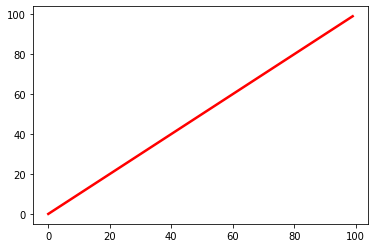

In [ ]:
# Plot the resultant equation
y_plot = []
for i in range(100):
    y_plot.append(b_0 + b_1 * i)

sns.lineplot(data=y_plot, color='red', linewidth=2.5)